In [22]:
import keras
keras.__version__

'2.2.4'

In [23]:
import keras.backend as TF
TF.floatx()

'float32'

In [0]:
#Lectura de MNIST
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [0]:
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In [0]:
from keras import layers
from keras import models
convNN = models.Sequential() #red tipo secuencial (no retropropagacion)

In [28]:
convNN.add(layers.Conv2D(filters     =32, #32 filtros
                         kernel_size =(3, 3), #tamaño kernel
                         activation  ='relu', #func de activación de esta capa
                         input_shape =(28, 28, 1))) #Solo debemos indicar dimensión de la primera capa 28x28 y un canal
keras.layers.Dropout(0.25) #dropout de 25% (neuronas a apagar en cada epoch)

In [29]:
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

In [0]:
convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [0]:
#agregamos más capas
convNN.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
convNN.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

In [32]:
convNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [33]:
keras.layers.Flatten(data_format=None)

In [0]:
convNN.add(layers.Flatten())

In [0]:
convNN.add(layers.Dense(units=64, activation='relu'))
convNN.add(layers.Dense(units=10, activation='softmax'))

In [36]:
convNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

In [0]:
convNN.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [38]:
import time
tic = time.time()

convNN.fit(x = train_images, 
           y = train_labels, 
           epochs    =5, 
           batch_size=64,
          verbose=2)

print('seconds=', time.time()-tic)

Epoch 1/5
 - 4s - loss: 0.1741 - acc: 0.9467
Epoch 2/5
 - 4s - loss: 0.0468 - acc: 0.9857
Epoch 3/5
 - 4s - loss: 0.0327 - acc: 0.9898
Epoch 4/5
 - 4s - loss: 0.0250 - acc: 0.9922
Epoch 5/5
 - 4s - loss: 0.0198 - acc: 0.9943
seconds= 19.809163331985474


In [39]:
test_loss, test_acc = convNN.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 57us/step


In [40]:
print('Accuracy:' ,test_acc, ', Otro WOW!')

Accuracy: 0.9922 , Otro WOW!


In [0]:
#matriz de confusión
import numpy as np

test_predicted_labels = convNN.predict(test_images)
test_true_labels      = np.argmax(test_labels,axis=1)
test_predicted_labels = np.argmax(test_predicted_labels,axis=1)

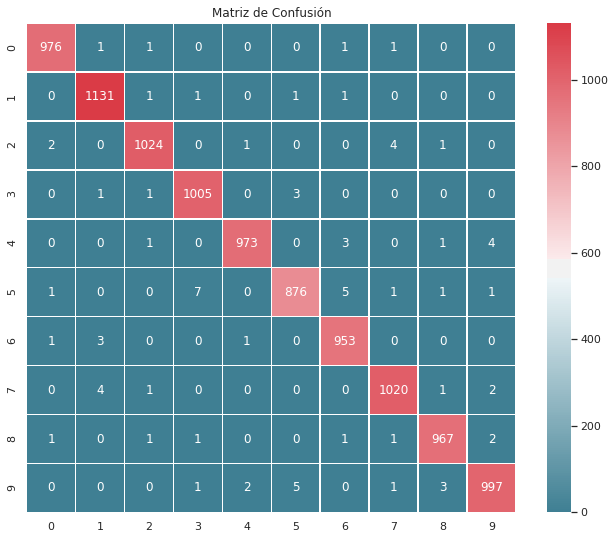

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

C = confusion_matrix(test_true_labels, test_predicted_labels)

f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()


Para correr más rápido el código usamos el gpu en lugar del cpu:
-> Entorno de ejecución
->Cambiar tipo de entorno de ejecución
-> elegir acelerador de hardware: gpu